<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

## Q4 PyTorch (40 points)

**Please include all the write up answers below to HW3:PDF. For the questions that need code, you need to include the screenshot of code to PDF submission to get points.**

While you were able to derive manual back-propagation rules for sigmoid and fully-connected layers, wouldn't it be nice if someone did that for lots of useful primatives and made it fast and easy to use for general computation?  Meet [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation). Since we have high-dimensional inputs (images) and low-dimensional outputs (a scalar loss), it turns out **forward mode AD** is very efficient. Popular autodiff packages include [pytorch](https://pytorch.org/) (Facebook), [tensorflow](https://www.tensorflow.org/) (Google), [autograd](https://github.com/HIPS/autograd) (Boston-area academics). Autograd provides its own replacement for numpy operators and is a drop-in replacement for numpy, except you can ask for gradients now. The other two are able to act as shim layers for [cuDNN](https://developer.nvidia.com/cudnn), an implementation of auto-diff made by Nvidia for use on their GPUs. Since GPUs are able to perform large amounts of math much faster than CPUs, this makes the former two packages very popular for researchers who train large networks. Tensorflow asks you to build a computational graph using its API, and then is able to pass data through that graph. PyTorch builds a dynamic graph and allows you to mix autograd functions with normal python code much more smoothly, so it is currently more popular among CMU students. 

We will use [pytorch](https://pytorch.org/) as a framework. Many computer vision projects use neural networks as a basic building block, so familiarity with one of these frameworks is a good skill to develop. Here, we basically replicate and slightly expand our handwritten character recognition networks, but do it in PyTorch instead of doing it ourselves. Feel free to use any tutorial you like, but we like [the offical one](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) or [this tutorial](http://cs231n.stanford.edu/notebooks/pytorch_tutorial.ipynb) (in a jupyter notebook) or [these slides](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture08.pdf (starting from number 35).

**For this section, you're free to implement these however you like. All of the tasks required here are fairly small and don't require a GPU if you use small networks, including 4.2.**

### Q4.1 Train a neural network in PyTorch

#### Q4.1.1 (10 Points Code+WriteUp)
 
Re-write and re-train your fully-connected network on NIST36 in PyTorch. Plot training accuracy and loss over time.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

Epoch: 0, Accuracy: 0.06351851851851852
Epoch: 1, Accuracy: 0.1316666666666666
Epoch: 2, Accuracy: 0.20055555555555546
Epoch: 3, Accuracy: 0.25953703703703707
Epoch: 4, Accuracy: 0.2864814814814814
Epoch: 5, Accuracy: 0.3212037037037039
Epoch: 6, Accuracy: 0.3517592592592594
Epoch: 7, Accuracy: 0.3875925925925929
Epoch: 8, Accuracy: 0.3956481481481481
Epoch: 9, Accuracy: 0.40379629629629615
Epoch: 10, Accuracy: 0.41638888888888903
Epoch: 11, Accuracy: 0.434074074074074
Epoch: 12, Accuracy: 0.46185185185185185
Epoch: 13, Accuracy: 0.4717592592592591
Epoch: 14, Accuracy: 0.49083333333333323
Epoch: 15, Accuracy: 0.49564814814814806
Epoch: 16, Accuracy: 0.510185185185185
Epoch: 17, Accuracy: 0.5288888888888891
Epoch: 18, Accuracy: 0.5417592592592593
Epoch: 19, Accuracy: 0.5644444444444444
Epoch: 20, Accuracy: 0.5774074074074074
Epoch: 21, Accuracy: 0.5897222222222221
Epoch: 22, Accuracy: 0.5976851851851852
Epoch: 23, Accuracy: 0.6019444444444447
Epoch: 24, Accuracy: 0.6068518518518515
Epoc

Text(0, 0.5, 'Loss')

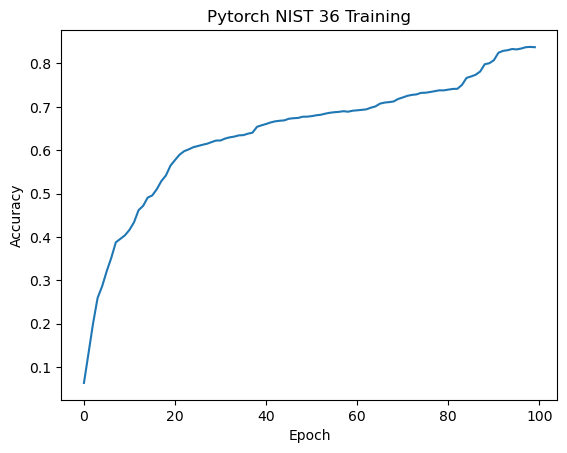

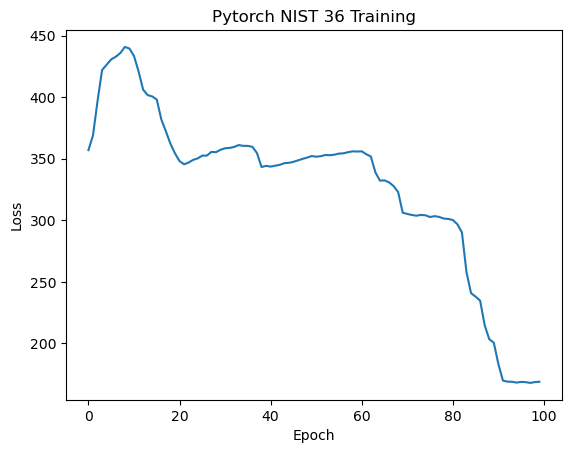

In [69]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
import scipy
import numpy as np
import ipynb
import nbimporter
from matplotlib import pyplot as plt
from q1 import compute_loss_and_acc

# Import training data
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')
train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

# Format the data to be souped in by Pytorch
data = []
for i in range(train_x.shape[0]):
    data.append((train_x[i].astype(np.float32), train_y[i].astype(np.float32)))
train_loader = DataLoader(data, shuffle = True, batch_size=100)

hidden_layer_dim = 64
net = nn.Sequential(
        nn.Linear(train_x.shape[1], hidden_layer_dim),
        nn.Sigmoid(),
        nn.Linear(hidden_layer_dim, train_y.shape[1]),
        nn.Softmax()
    )

# Set the loss and the optimizers
criterion = nn.CrossEntropyLoss()
optimizer = Adam(net.parameters(), lr=1e-3)
epochs = 100

# Training
training_accs = []
training_losses = []
for i in range(epochs):
    train_acc_epoch = 0
    train_loss_epoch = 0
    for x, y in train_loader:
        y_hat = net.forward(x)
        train_loss, train_acc = compute_loss_and_acc(y.detach().numpy(), y_hat.detach().numpy())
        train_acc_epoch += train_acc / len(train_loader)
        train_loss_epoch += train_loss / len(train_loader)
        loss  = criterion(y_hat, y)
        # training_losses.append(loss.detach())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {i}, Accuracy: {train_acc_epoch}")
    training_accs.append(train_acc_epoch)
    training_losses.append(train_loss_epoch)

# Show training error
plt.figure(1)
plt.plot(list(range(epochs)), training_accs)
plt.title("Pytorch NIST 36 Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.figure(2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(list(range(epochs)), training_losses)
plt.title("Pytorch NIST 36 Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")

#### Q4.1.2 (3 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on MNIST. Plot training accuracy and loss over time.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

C:\Users\chris\AppData\Local\Temp\ipykernel_22164\1795080952.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.out(x)


Epoch: 0, Accuracy: 0.8493333333333432
Epoch: 1, Accuracy: 0.9754166666666768
Epoch: 2, Accuracy: 0.9822500000000101
Epoch: 3, Accuracy: 0.9859000000000099
Epoch: 4, Accuracy: 0.9879333333333433
Epoch: 5, Accuracy: 0.9898000000000099
Epoch: 6, Accuracy: 0.9913166666666767
Epoch: 7, Accuracy: 0.9923833333333434
Epoch: 8, Accuracy: 0.99255000000001
Epoch: 9, Accuracy: 0.9931666666666766
Epoch: 10, Accuracy: 0.9939333333333433
Epoch: 11, Accuracy: 0.9939666666666765
Epoch: 12, Accuracy: 0.99505000000001
Epoch: 13, Accuracy: 0.99545000000001
Epoch: 14, Accuracy: 0.9955000000000099
Epoch: 15, Accuracy: 0.9954666666666766
Epoch: 16, Accuracy: 0.99610000000001
Epoch: 17, Accuracy: 0.9961666666666766
Epoch: 18, Accuracy: 0.9959166666666766
Epoch: 19, Accuracy: 0.9960333333333432


Text(0, 0.5, 'Loss')

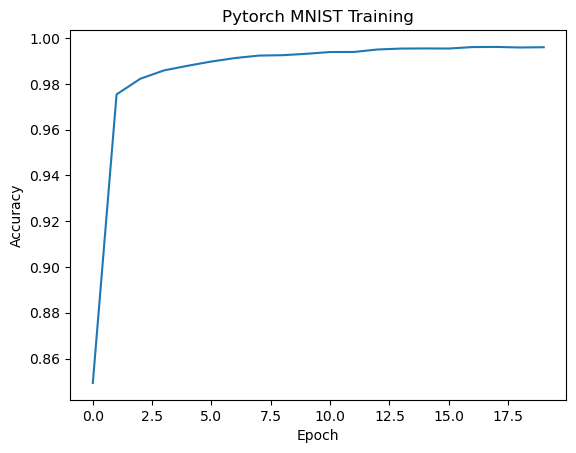

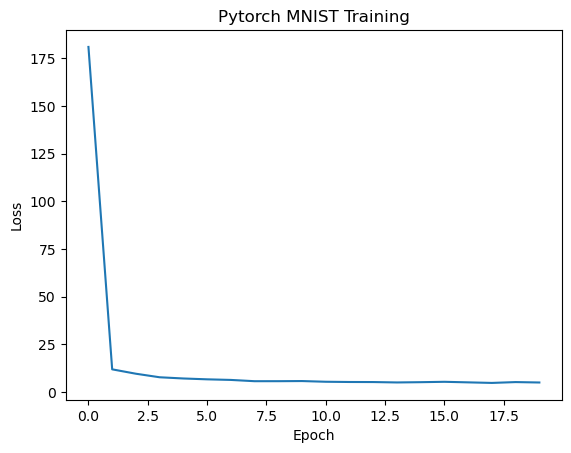

In [70]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
train_data = MNIST(root = "./data/MNIST", download=True, transform = ToTensor(), train = True)
train_loader = DataLoader(train_data, 100,)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MyFirstCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # self.conv3 = nn.Sequential(
        #     nn.Conv2d(
        #         in_channels=64,
        #         out_channels=256,
        #         kernel_size=5,
        #         stride=1,
        #         padding=2
        #     ),
        #     nn.LeakyReLU()
        # )

        self.fc1 = nn.Linear(64*7*7, 10)

        self.out = nn.Softmax()
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        #x = self.conv3(x)
        x = self.fc1(x.view(x.shape[0], -1))
        return self.out(x)


# Set the loss and the optimizers
net_mnist = MyFirstCNN()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(net_mnist.parameters(), lr=1e-3)
epochs = 20

# Training
training_accs = []
training_losses = []
for i in range(epochs):
    train_acc_epoch = 0
    train_loss_epoch = 0
    for x, y in train_loader:

        # One hot encode our labels
        one_hot_y = []
        for label in y:
            arr = np.zeros(10)
            arr[label] = 1
            one_hot_y.append(arr)

        y_hat = net_mnist.forward(x)
        train_loss, train_acc = compute_loss_and_acc(np.array(one_hot_y), y_hat.detach().numpy())
        train_acc_epoch += train_acc / len(train_loader) 
        train_loss_epoch += train_loss / len(train_loader)
        loss  = criterion(y_hat, y)
        # training_losses.append(loss.detach())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {i}, Accuracy: {train_acc_epoch}")
    training_accs.append(train_acc_epoch)
    training_losses.append(train_loss_epoch)

# Show training error
plt.figure(1)
plt.plot(list(range(epochs)), training_accs)
plt.title("Pytorch MNIST Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.figure(2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(list(range(epochs)), training_losses)
plt.title("Pytorch MNIST Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")

#### Q4.1.3 (2 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on the included NIST36 dataset. Plot training accuracy and loss over time.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

C:\Users\chris\AppData\Local\Temp\ipykernel_22164\230637049.py:60: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.out(x)


Epoch: 0, Accuracy: 0.13129629629629633
Epoch: 1, Accuracy: 0.5470370370370369
Epoch: 2, Accuracy: 0.6368518518518519
Epoch: 3, Accuracy: 0.684351851851852
Epoch: 4, Accuracy: 0.7162037037037036
Epoch: 5, Accuracy: 0.7351851851851849
Epoch: 6, Accuracy: 0.7504629629629628
Epoch: 7, Accuracy: 0.7640740740740743
Epoch: 8, Accuracy: 0.7749074074074077
Epoch: 9, Accuracy: 0.7861111111111109
Epoch: 10, Accuracy: 0.7947222222222224
Epoch: 11, Accuracy: 0.8026851851851856
Epoch: 12, Accuracy: 0.8076851851851855
Epoch: 13, Accuracy: 0.8135185185185183
Epoch: 14, Accuracy: 0.817500000000001
Epoch: 15, Accuracy: 0.8229629629629631
Epoch: 16, Accuracy: 0.8260185185185183
Epoch: 17, Accuracy: 0.8333333333333338
Epoch: 18, Accuracy: 0.8334259259259259
Epoch: 19, Accuracy: 0.8373148148148147


Text(0, 0.5, 'Loss')

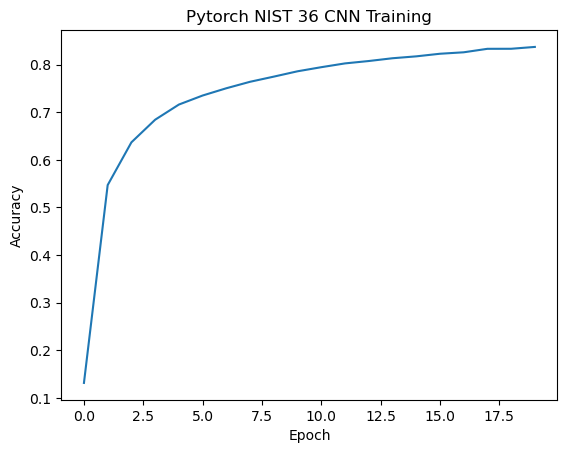

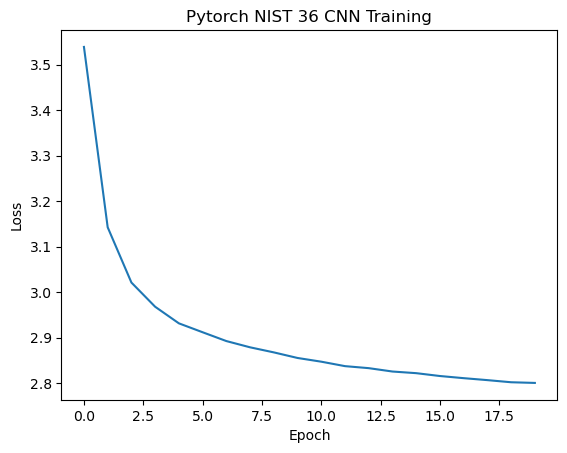

In [89]:
# Import training data
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')
train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

# Format the data to be souped in by Pytorch
data = []
for i in range(train_x.shape[0]):
    data.append((train_x[i].astype(np.float32), train_y[i].astype(np.float32)))
train_loader = DataLoader(data, shuffle = True, batch_size=100)

class MyFirstCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=4,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=4,
                out_channels=8,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # self.conv3 = nn.Sequential(
        #     nn.Conv2d(
        #         in_channels=64,
        #         out_channels=256,
        #         kernel_size=5,
        #         stride=1,
        #         padding=2
        #     ),
        #     nn.LeakyReLU()
        # )

        self.fc1 = nn.Linear(8*8*8, 36)

        self.out = nn.Softmax()
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        #x = self.conv3(x)
        x = self.fc1(x.view(x.shape[0], -1))
        return self.out(x)

# Set the loss and the optimizers
net_custom = MyFirstCNN()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(net_custom.parameters(), lr=1e-3)
epochs = 20

# Training
training_accs = []
training_losses = []
for i in range(epochs):
    train_acc_epoch = 0
    train_loss_epoch = 0
    for x, y in train_loader:

        y_hat = net_custom.forward(x.reshape(x.shape[0], 1,  32, 32))
        _, train_acc = compute_loss_and_acc(y.detach().numpy(), y_hat.detach().numpy())
        train_acc_epoch += train_acc / len(train_loader)
        train_loss_epoch += loss.detach() / len(train_loader)
        loss  = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {i}, Accuracy: {train_acc_epoch}")
    training_accs.append(train_acc_epoch)
    training_losses.append(train_loss_epoch)

# Show training error
plt.figure(1)
plt.title("Pytorch NIST 36 CNN Training")
plt.plot(list(range(epochs)), training_accs)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.figure(2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(list(range(epochs)), training_losses)
plt.title("Pytorch NIST 36 CNN Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")

#### Q4.1.4 (15 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on the EMNIST Balanced dataset  (available in *torchvision.datasets*, use *balanced* split) and evaluate it on the findLetters bounded boxes from the images folder. Find the accuracy on these bounded boxes.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

c:\Users\chris\anaconda3\envs\vision_conda\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\chris\AppData\Local\Temp\ipykernel_22164\1818373414.py:53: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.out(x)


Epoch: 0, Accuracy: 0.45111702127659586
Epoch: 1, Accuracy: 0.5819414893617018
Epoch: 2, Accuracy: 0.6602570921985821
Epoch: 3, Accuracy: 0.6770212765957452
Epoch: 4, Accuracy: 0.683005319148938
Epoch: 5, Accuracy: 0.6865691489361724
Epoch: 6, Accuracy: 0.690053191489363
Epoch: 7, Accuracy: 0.696959219858156
Epoch: 8, Accuracy: 0.7017287234042555
Epoch: 9, Accuracy: 0.7038829787234041
Epoch: 10, Accuracy: 0.7058599290780139
Epoch: 11, Accuracy: 0.7082978723404256
Epoch: 12, Accuracy: 0.7235017730496451
Epoch: 13, Accuracy: 0.7279521276595738
Epoch: 14, Accuracy: 0.7299734042553172
Epoch: 15, Accuracy: 0.7352393617021279
Epoch: 16, Accuracy: 0.7388918439716308
Epoch: 17, Accuracy: 0.7471985815602817
Epoch: 18, Accuracy: 0.7578989361702118
Epoch: 19, Accuracy: 0.7597163120567366
Epoch: 20, Accuracy: 0.7614095744680837
Epoch: 21, Accuracy: 0.7635017730496435
Epoch: 22, Accuracy: 0.7642375886524814
Epoch: 23, Accuracy: 0.774689716312055
Epoch: 24, Accuracy: 0.7826152482269499
Epoch: 25, Ac

Text(0, 0.5, 'Accuracy')

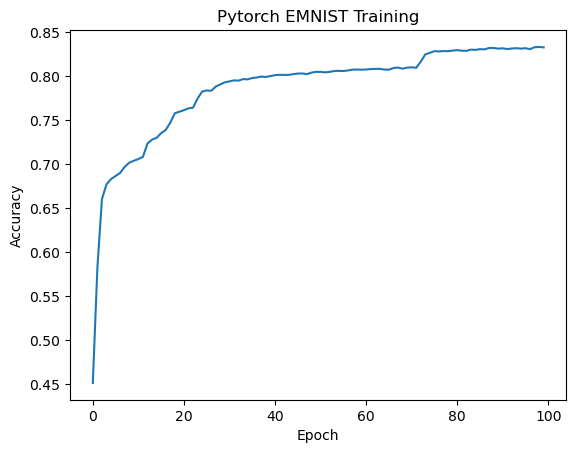

In [90]:
from torchvision.datasets import EMNIST
from torchvision.transforms import ToTensor
train_data = EMNIST(root = "./data/EMNIST", split = "balanced", download=True, transform = ToTensor(), train = True)
train_loader = DataLoader(train_data, batch_size = 100)

class MyFirstCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=4,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=4,
                out_channels=8,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # self.conv3 = nn.Sequential(
        #     nn.Conv2d(
        #         in_channels=64,
        #         out_channels=256,
        #         kernel_size=5,
        #         stride=1,
        #         padding=2
        #     ),
        #     nn.LeakyReLU()
        # )

        self.fc1 = nn.Linear(8*7*7, torch.max(train_data.train_labels) + 1)

        self.out = nn.Softmax()
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        #x = self.conv3(x)
        x = self.fc1(x.view(x.shape[0], -1))
        return self.out(x)


# Set the loss and the optimizers
net_eminst = MyFirstCNN()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(net_eminst.parameters(), lr=1e-3)
epochs = 100

# Training
training_accs = []
for i in range(epochs):
    train_acc_epoch = 0
    for x, y in train_loader:

        # One hot encode our labels
        one_hot_y = []
        for label in y:
            arr = np.zeros(torch.max(train_data.train_labels) + 1)
            arr[label] = 1
            one_hot_y.append(arr)

        y_hat = net_eminst.forward(x)
        _, train_acc = compute_loss_and_acc(np.array(one_hot_y), y_hat.detach().numpy())
        train_acc_epoch += train_acc / len(train_loader) 
        loss  = criterion(y_hat, y)
        # training_losses.append(loss.detach())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {i}, Accuracy: {train_acc_epoch}")
    training_accs.append(train_acc_epoch)
# Show training error
plt.plot(list(range(epochs)), training_accs)
plt.title("Pytorch EMNIST Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [119]:
import pickle
import string
import torch
import os
import numpy as np
from skimage.transform import resize

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
with open("image_word_dict.pkl", "rb") as f:
    img_word_dict = pickle.load(f)


train_data = EMNIST(root = "./data/EMNIST", split = "balanced", download=True, transform = ToTensor(), train = True)
train_loader = DataLoader(train_data, batch_size = 100)

letters = list(train_data.class_to_idx.keys())
for img in os.listdir('images'):
    content = ""
    for word in img_word_dict[img]:
        word_str = ""
        for letter in word:
            letter_resized = resize(letter.reshape(32, 32).astype(np.float32), (28,28)).reshape(1,1,28,28)
            inverted_letter = np.ones_like(letter_resized) * 0.5
            #Flip the values without switching to binary
            inverted_letter = inverted_letter - (letter_resized - 0.5)
            # plt.imshow(inverted_letter[0][0])
            pred = net_eminst.forward(torch.from_numpy(inverted_letter))
            word_str += letters[torch.argmax(pred)]

        content += word_str
        content += " "
    print(content)

C:\Users\chris\AppData\Local\Temp\ipykernel_22164\1818373414.py:53: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.out(x)


T0 D0 CZST Z MAKE A TODO CXST 2 CHECK OFF THE FXRST THJNG 0N TODO CEST 3 RBACXZE YOU HAVE AKREADY COMPCETED 2 THDNGS 4O REWARD YOURSEUFWDTH NAP 
A BC D E FG H ZJ K C MN 0 P Q R S TV V W X YZ 2 3 4 S G7 8gQ 
HAZKUS ARE E MASY BUT SOMET2MES THEY DONT MAKE SEWNSE4 REFR GERARWDR 
K EPK KARNZNG WEEPER KGARNZNG QEEPEST qEARNZNG 


### Q4.2 Fine Tuning

#### Q4.2.1 (10 Points Code+WriteUp)
 
Fine-tune a single layer classifier using pytorch on the [flowers 17](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html) (or [flowers 102](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html)!) dataset using [squeezenet1\_1](https://pytorch.org/docs/stable/torchvision/models.html), as well as an architecture you've designed yourself (*3 conv layers, followed 2 fc layers, it's standard [slide 6](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture09.pdf)*) and trained from scratch. How do they compare? 
    
We include a script in `scripts/` to fetch the flowers dataset and extract it in a way that [PyTorch ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) can consume it, see [an example](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#afterword-torchvision), from **data/oxford-flowers17**. You should look at how SqueezeNet is [defined](https://github.com/pytorch/vision/blob/master/torchvision/models/squeezenet.py), and just replace the classifier layer. There exists a pretty good example for [fine-tuning](https://gist.github.com/jcjohnson/6e41e8512c17eae5da50aebef3378a4c) in PyTorch.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

Epoch: 0, Accuracy: 0.018571428571428572
Epoch: 1, Accuracy: 0.13285714285714287
Epoch: 2, Accuracy: 0.18642857142857144
Epoch: 3, Accuracy: 0.28928571428571426
Epoch: 4, Accuracy: 0.3775
Epoch: 5, Accuracy: 0.44000000000000006
Epoch: 6, Accuracy: 0.47357142857142864
Epoch: 7, Accuracy: 0.5267857142857142
Epoch: 8, Accuracy: 0.5978571428571429
Epoch: 9, Accuracy: 0.6275
Epoch: 10, Accuracy: 0.6707142857142858
Epoch: 11, Accuracy: 0.7128571428571429
Epoch: 12, Accuracy: 0.7678571428571429
Epoch: 13, Accuracy: 0.7749999999999999
Epoch: 14, Accuracy: 0.7889285714285714
Epoch: 15, Accuracy: 0.8074999999999999
Epoch: 16, Accuracy: 0.8285714285714285
Epoch: 17, Accuracy: 0.8453571428571428
Epoch: 18, Accuracy: 0.8589285714285715
Epoch: 19, Accuracy: 0.8692857142857143


Text(0, 0.5, 'Loss')

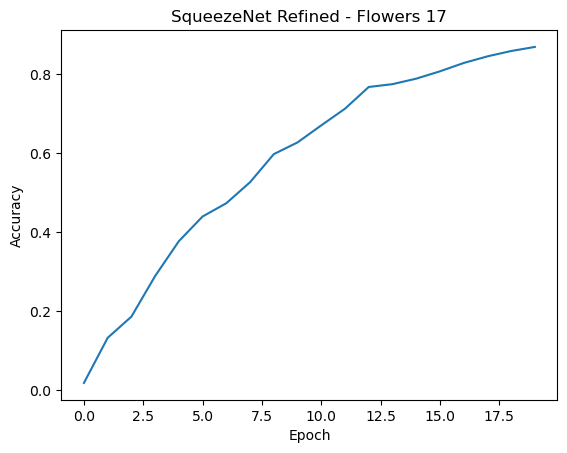

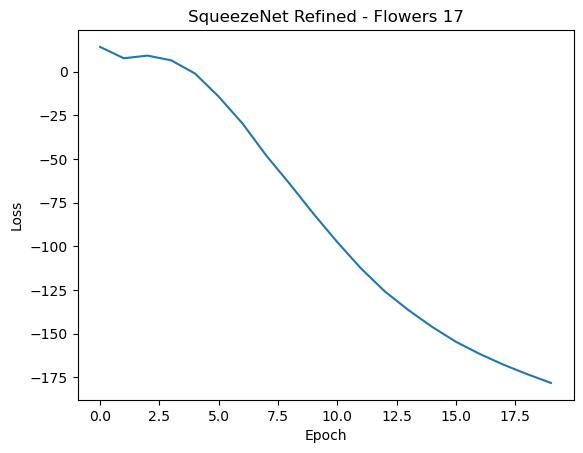

In [104]:
from torchvision.models import squeezenet1_1
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Resize
import torchvision

# Load in the training data
transform=torchvision.transforms.Compose([Resize((224,224)),ToTensor()])
train_data = ImageFolder(root = "data/oxford-flowers17/train", transform = transform)
train_loader = DataLoader(train_data, batch_size = 100)

# Chop of the classification layer and add our own for transfer learning
sqz = squeezenet1_1(pretrained=True)
num_classes = len(train_data.classes)
sqz.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))

# First we want to train only the reinitialized last layer for a few epochs.
# During this phase we do not need to compute gradients with respect to the
# other weights of the model, so we set the requires_grad flag to False for
# all model parameters, then set requires_grad=True for the parameters in the
# last layer only.
for param in sqz.parameters():
    param.requires_grad = False
for param in sqz.classifier.parameters():
    param.requires_grad = True

# Construct an Optimizer object for updating the last layer only.
optimizer = torch.optim.Adam(sqz.classifier.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Training
epochs = 20
training_accs = []
training_losses = []
for i in range(epochs):
    train_acc_epoch = 0
    train_loss_epoch = 0

    if i == 5:
        for param in sqz.parameters():
            param.requires_grad = True
    for x, y in train_loader:

        # One hot encode our labels
        one_hot_y = []
        for label in y:
            arr = np.zeros(len(train_data.classes))
            arr[label] = 1
            one_hot_y.append(arr)

        y_hat = sqz.forward(x)
        train_loss, train_acc = compute_loss_and_acc(np.array(one_hot_y), y_hat.detach().numpy())
        train_acc_epoch += train_acc / len(train_loader) 
        train_loss_epoch += train_loss / len(train_loader)
        loss_l  = criterion(y_hat, y).requires_grad_(True)
        # training_losses.append(loss.detach())
        optimizer.zero_grad()
        loss_l.backward()
        optimizer.step()
    print(f"Epoch: {i}, Accuracy: {train_acc_epoch}")
    training_accs.append(train_acc_epoch)
    training_losses.append(train_loss_epoch)

plt.figure(1)
plt.plot(list(range(epochs)), training_accs)
plt.title("SqueezeNet Refined - Flowers 17")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.figure(2)
plt.plot(list(range(epochs)), training_losses)
plt.title("SqueezeNet Refined - Flowers 17")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [114]:
class MySecondCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=16,
                kernel_size=7,
                stride=1,
                padding=2
            ),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=16,
                kernel_size=5,
                stride=2,
                padding=2
            ),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.out = nn.Sequential(
            nn.Linear(32*15*15, 32*15*15),
            nn.LeakyReLU(),
            nn.Linear(32*15*15, num_classes),
            nn.Softmax()
        )
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        y = self.out(x.view(x.shape[0], -1))
        return y

Epoch: 0, Accuracy: 0.0
Epoch: 1, Accuracy: 0.047142857142857146
Epoch: 2, Accuracy: 0.08821428571428572
Epoch: 3, Accuracy: 0.08642857142857142
Epoch: 4, Accuracy: 0.08571428571428572
Epoch: 5, Accuracy: 0.09321428571428572
Epoch: 6, Accuracy: 0.10607142857142857
Epoch: 7, Accuracy: 0.07785714285714286
Epoch: 8, Accuracy: 0.06285714285714286
Epoch: 9, Accuracy: 0.07464285714285715
Epoch: 10, Accuracy: 0.13607142857142857
Epoch: 11, Accuracy: 0.105
Epoch: 12, Accuracy: 0.18714285714285717
Epoch: 13, Accuracy: 0.22785714285714287
Epoch: 14, Accuracy: 0.27464285714285713
Epoch: 15, Accuracy: 0.29892857142857143
Epoch: 16, Accuracy: 0.3075
Epoch: 17, Accuracy: 0.3507142857142857
Epoch: 18, Accuracy: 0.2935714285714286
Epoch: 19, Accuracy: 0.35714285714285715
Epoch: 20, Accuracy: 0.3982142857142858
Epoch: 21, Accuracy: 0.43857142857142856
Epoch: 22, Accuracy: 0.4685714285714285
Epoch: 23, Accuracy: 0.48392857142857143
Epoch: 24, Accuracy: 0.51
Epoch: 25, Accuracy: 0.5278571428571428
Epoch:

Text(0, 0.5, 'Loss')

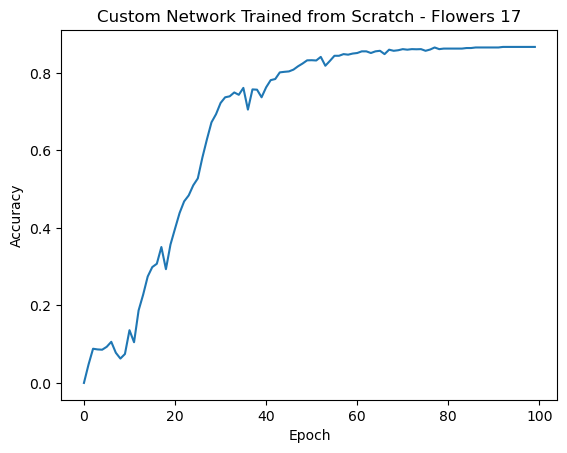

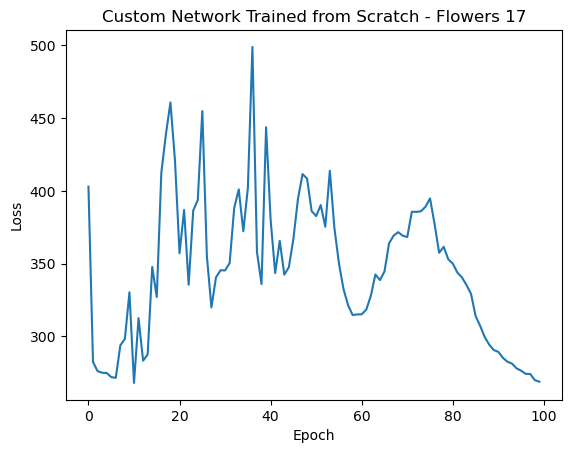

In [116]:
from torchvision.transforms import Grayscale

# Load in the training data
transform=torchvision.transforms.Compose([Resize((224,224)),ToTensor()])
train_data = ImageFolder(root = "data/oxford-flowers17/train", transform = transform)
train_loader = DataLoader(train_data, batch_size = 100)

second_net = MySecondCNN(len(train_data.classes))
criterion = nn.CrossEntropyLoss()
optimizer = Adam(second_net.parameters(), lr=1e-3)
epochs = 100

# Training
training_accs = []
training_losses = []
for i in range(epochs):
    train_acc_epoch = 0
    train_loss_epoch = 0
    for x, y in train_loader:

        # One hot encode our labels
        one_hot_y = []
        for label in y:
            arr = np.zeros(len(train_data.classes))
            arr[label] = 1
            one_hot_y.append(arr)

        y_hat = second_net.forward(x)
        train_loss, train_acc = compute_loss_and_acc(np.array(one_hot_y), y_hat.detach().numpy())
        train_acc_epoch += train_acc / len(train_loader) 
        train_loss_epoch += train_loss / len(train_loader)
        loss  = criterion(y_hat, y)
        # training_losses.append(loss.detach())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {i}, Accuracy: {train_acc_epoch}")
    training_accs.append(train_acc_epoch)
    training_losses.append(train_loss_epoch)


plt.figure(1)
plt.plot(list(range(epochs)), training_accs)
plt.title("Custom Network Trained from Scratch - Flowers 17")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.figure(2)
plt.plot(list(range(epochs)), training_losses)
plt.title("Custom Network Trained from Scratch - Flowers 17")
plt.xlabel("Epoch")
plt.ylabel("Loss")